# **Regras de Associação**

* Aprendizagem Não Supervisionada.
* Objetiva encontrar relacionamentos e padrões entre elementos pertencentes ao conjunto de dados.


**Aplicações:**

* Campanhas de marketing.
* Controlar estoque de lojas.
* Descrever falhas em linhas de comunicação.
* Ações na interface do usuário.
* Ocorrências de doenças recorrentes

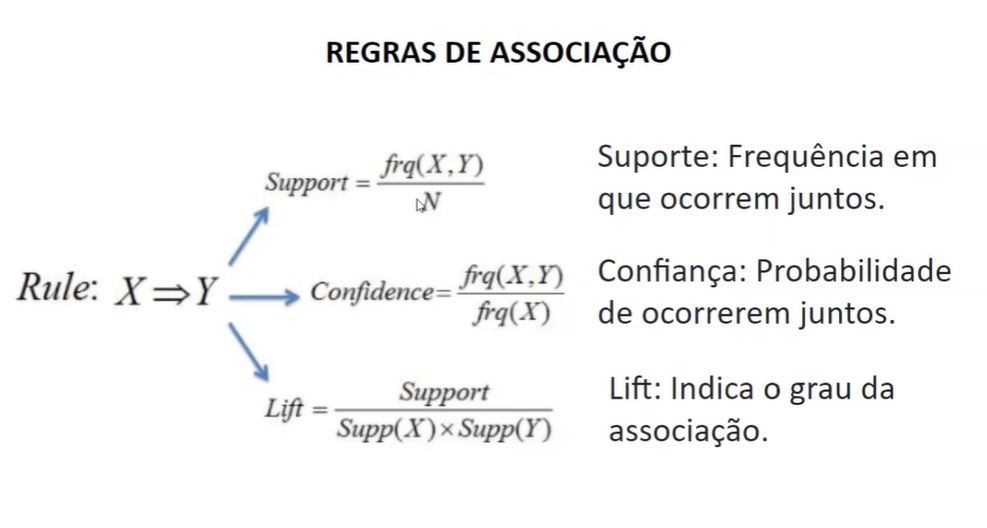

---

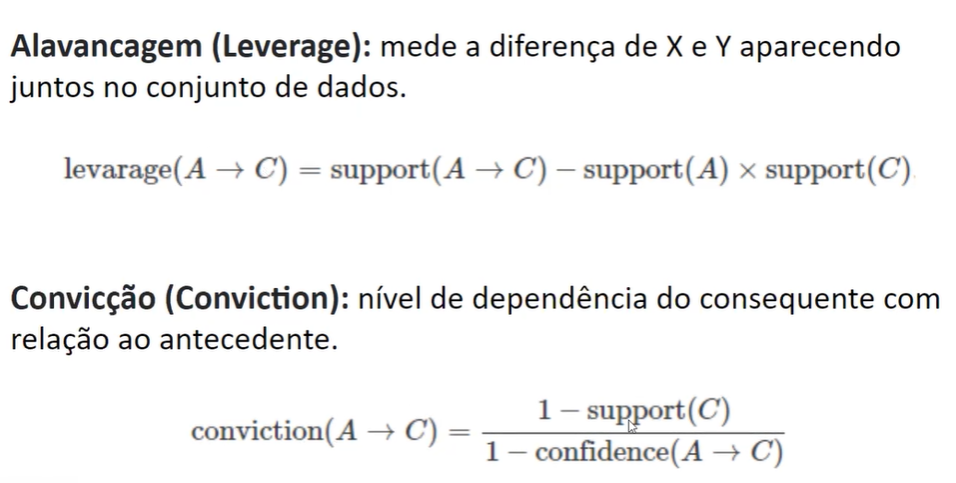

---

**Algoritmos**

* **APRIORI:** Utiliza conjuntos de itens frequentes para gerar regras de associação.
Obs: Conjunto de itens frequentes é um conjunto de itens cujo valor de suporte é maior que um valor limite.
* **ECLAT:** É uma versão derivada do algoritmo Apriori, com abordagem de associação que o torna mais rápido.
Utiliza somente o suporte e não gera regras, utiliza somente os itens frequentes.

# **ECLAT**

In [1]:
!pip install pyECLAT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pyECLAT import Example1

In [3]:
dados = Example1().get()

In [4]:
dados

,0,1,2,3
0,milk,beer,bread,butter
1,coffe,bread,butter,NaN
2,coffe,bread,butter,NaN
3,milk,coffe,bread,butter
4,beer,NaN,NaN,NaN
5,butter,NaN,NaN,NaN
6,bread,NaN,NaN,NaN
7,bean,NaN,NaN,NaN
8,rice,bean,NaN,NaN
9,rice,NaN,NaN,NaN


In [5]:
from pyECLAT import ECLAT
eclat = ECLAT(data=dados, verbose=True)

100%|██████████| 7/7 [00:00<00:00, 1567.04it/s]


In [6]:
eclat.df_bin

,bread,rice,coffe,milk,butter,bean,beer
0,1,0,0,1,1,0,1
1,1,0,1,0,1,0,0
2,1,0,1,0,1,0,0
3,1,0,1,1,1,0,0
4,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0
7,0,0,0,0,0,1,0
8,0,1,0,0,0,1,0
9,0,1,0,0,0,0,0


In [7]:
eclat.uniq_

[nan, 'bread', 'rice', 'coffe', 'milk', 'butter', 'bean', 'beer']

In [8]:
indices, suporte = eclat.fit(min_support=0.2, min_combination=2, max_combination=4)

Combination 2 by 2


21it [00:00, 216.65it/s]


Combination 3 by 3


35it [00:00, 157.22it/s]


Combination 4 by 4


35it [00:00, 194.48it/s]


In [9]:
indices

{'bread & coffe': [1, 2, 3],
 'bread & milk': [0, 3],
 'bread & butter': [0, 1, 2, 3],
 'coffe & butter': [1, 2, 3],
 'milk & butter': [0, 3],
 'bread & coffe & butter': [1, 2, 3],
 'bread & milk & butter': [0, 3]}

In [10]:
suporte

{'bread & coffe': 0.3,
 'bread & milk': 0.2,
 'bread & butter': 0.4,
 'coffe & butter': 0.3,
 'milk & butter': 0.2,
 'bread & coffe & butter': 0.3,
 'bread & milk & butter': 0.2}

# **APRIORI**

In [11]:
from pyECLAT import Example1
dados = Example1().get()
dados

,0,1,2,3
0,milk,beer,bread,butter
1,coffe,bread,butter,NaN
2,coffe,bread,butter,NaN
3,milk,coffe,bread,butter
4,beer,NaN,NaN,NaN
5,butter,NaN,NaN,NaN
6,bread,NaN,NaN,NaN
7,bean,NaN,NaN,NaN
8,rice,bean,NaN,NaN
9,rice,NaN,NaN,NaN


In [12]:
dados.shape

(10, 4)

In [13]:
from pyECLAT import ECLAT
eclat = ECLAT(data=dados)
dados2 = eclat.df_bin
dados2

,bread,rice,coffe,milk,butter,bean,beer
0,1,0,0,1,1,0,1
1,1,0,1,0,1,0,0
2,1,0,1,0,1,0,0
3,1,0,1,1,1,0,0
4,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0
7,0,0,0,0,0,1,0
8,0,1,0,0,0,1,0
9,0,1,0,0,0,0,0


In [14]:
from mlxtend.frequent_patterns import apriori, association_rules

In [15]:
# Gerando a associação
associacao = apriori(dados2, min_support=0.05, use_colnames=True)

In [16]:
# Colocando em ordem dos mais frequentes
associacao.sort_values("support", ascending=False).head(15)

,support,itemsets
0,0.5,(bread)
4,0.5,(butter)
9,0.4,"(butter, bread)"
7,0.3,"(coffe, bread)"
18,0.3,"(coffe, butter, bread)"
13,0.3,"(coffe, butter)"
2,0.3,(coffe)
6,0.2,(beer)
19,0.2,"(milk, butter, bread)"
8,0.2,"(milk, bread)"


In [17]:
# Criando as regras de associação
regras = association_rules(associacao, metric="confidence")

In [18]:
# Colocando em ordem de suporte, confiança ou grau de associação (Lift)
resultado = regras.sort_values("lift", ascending=False)

In [19]:
resultado.head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,"(bread, beer)",(milk),0.1,0.2,0.1,1.0,5.0,0.08,inf
19,"(butter, beer)",(milk),0.1,0.2,0.1,1.0,5.0,0.08,inf
27,"(butter, beer)","(milk, bread)",0.1,0.2,0.1,1.0,5.0,0.08,inf
25,"(bread, butter, beer)",(milk),0.1,0.2,0.1,1.0,5.0,0.08,inf
28,"(bread, beer)","(milk, butter)",0.1,0.2,0.1,1.0,5.0,0.08,inf
26,"(milk, beer)","(butter, bread)",0.1,0.4,0.1,1.0,2.5,0.06,inf
9,(coffe),"(butter, bread)",0.3,0.4,0.3,1.0,2.5,0.18,inf
22,"(coffe, milk)","(butter, bread)",0.1,0.4,0.1,1.0,2.5,0.06,inf
12,(milk),"(butter, bread)",0.2,0.4,0.2,1.0,2.5,0.12,inf
5,(milk),(butter),0.2,0.5,0.2,1.0,2.0,0.10,inf


# **APRENDIZAGEM NÃO SUPERVISIONADA: ASSOCIAÇÃO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para associar produtos de mercado. 

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/heeraldedhia/groceries-dataset

In [23]:
import numpy as np
import pandas as pd

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv('/content/Groceries_dataset.csv')

In [26]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [27]:
df.shape

(38765, 3)

## **ANÁLISE, TRATAMENTO E PRÉ-PROCESSAMENTO DOS DADOS**

**Valores Missing (NAN)**

In [28]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

**Análise dos tipos de atributos.**

In [29]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [30]:
df["Date"]=pd.to_datetime(df["Date"])

In [31]:
df.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

In [32]:
df["itemDescription"].value_counts().head(30)

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
root vegetables          1071
tropical fruit           1032
bottled water             933
sausage                   924
citrus fruit              812
pastry                    785
pip fruit                 744
shopping bags             731
canned beer               717
bottled beer              687
whipped/sour cream        662
newspapers                596
frankfurter               580
brown bread               571
pork                      566
domestic eggs             566
butter                    534
fruit/vegetable juice     518
beef                      516
curd                      514
margarine                 491
coffee                    476
frozen vegetables         425
chicken                   422
white bread               362
Name: itemDescription, dtype: int64

In [33]:
df["Member_number"].value_counts().head(10)

3180    36
3737    33
3050    33
2051    33
2625    31
3915    31
2433    31
2271    31
3872    30
3289    29
Name: Member_number, dtype: int64

In [34]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [35]:
df2 = df.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().fillna(0).applymap(
    lambda x: 1 if x > 0 else 0)

In [36]:
df2

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df2.iloc[0:12, 0:12]

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer
Member_number,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,1,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,0,0
1005,0,0,0,0,0,0,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,0,1
1008,0,0,0,0,0,0,0,0,0,0,0,0
1009,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
df2.shape

(3898, 167)

## **APRIORI**

In [39]:
from mlxtend.frequent_patterns import apriori, association_rules

In [40]:
# Gerando a associação
associacao = apriori(df2, min_support=0.05, use_colnames=True)

In [41]:
# Colocando em ordem dos mais frequentes
associacao.sort_values("support", ascending=False).head(10)

,support,itemsets
55,0.458184,(whole milk)
37,0.376603,(other vegetables)
41,0.349666,(rolls/buns)
47,0.313494,(soda)
56,0.282966,(yogurt)
51,0.233710,(tropical fruit)
42,0.230631,(root vegetables)
5,0.213699,(bottled water)
44,0.206003,(sausage)
116,0.191380,"(whole milk, other vegetables)"


In [42]:
# Criando as regras de associação
regras = association_rules(associacao, metric="lift")

In [43]:
# Colocando em ordem de suporte, confiança ou grau de associação (Lift)
resultado = regras.sort_values("support", ascending=False)

In [44]:
resultado.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
118,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564
119,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
152,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592
153,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190
182,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971
183,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310
193,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185
192,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076
105,(other vegetables),(rolls/buns),0.376603,0.349666,0.146742,0.389646,1.114335,0.015056,1.065502
104,(rolls/buns),(other vegetables),0.349666,0.376603,0.146742,0.419663,1.114335,0.015056,1.074197


## **DESAFIO 6**

Desenvolver os algoritmos Apriori e Eclat utilizando o Exemplo 2 disponível na biblioteca pyECLAT.

In [45]:
!pip install pyECLAT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from pyECLAT import Example2
dados = Example2().get()
dados

,0,1,2,3,4,5,6
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN
...,...,...,...,...,...,...,...
2996,green tea,NaN,NaN,NaN,NaN,NaN,NaN
2997,shrimp,cake,NaN,NaN,NaN,NaN,NaN
2998,ham,ground beef,mineral water,NaN,NaN,NaN,NaN
2999,burgers,frozen vegetables,whole wheat pasta,mineral water,chocolate,eggs,blueberries
